In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw_obesity = pd.read_csv('data/Obesity_prediction.csv')
raw_obesity.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [30]:
# 1) Basic overview
print("shape:", raw_obesity.shape)
print("columns:", raw_obesity.columns.tolist())
raw_obesity.info()
raw_obesity.describe()

shape: (2111, 17)
columns: ['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'Obesity']
<class 'pandas.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   str    
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   str    
 5   FAVC            2111 non-null   str    
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   str    
 9   SMOKE           2111 non-null   str    
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   str    
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [31]:
# 2) Missing values + duplicates
raw_obesity.isnull().sum().sort_values(ascending=False)

Gender            0
SMOKE             0
MTRANS            0
CALC              0
TUE               0
FAF               0
SCC               0
CH2O              0
CAEC              0
Age               0
NCP               0
FCVC              0
FAVC              0
family_history    0
Weight            0
Height            0
Obesity           0
dtype: int64

In [32]:
print("total missing:", raw_obesity.isnull().sum().sum())
print("duplicated rows:", raw_obesity.duplicated().sum())

total missing: 0
duplicated rows: 24


In [33]:
# 3) Target(label) distribution
raw_obesity['Obesity'].value_counts()

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [34]:
raw_obesity['Obesity'].value_counts(normalize=True).round(3)

Obesity
Obesity_Type_I         0.166
Obesity_Type_III       0.153
Obesity_Type_II        0.141
Overweight_Level_I     0.137
Overweight_Level_II    0.137
Normal_Weight          0.136
Insufficient_Weight    0.129
Name: proportion, dtype: float64

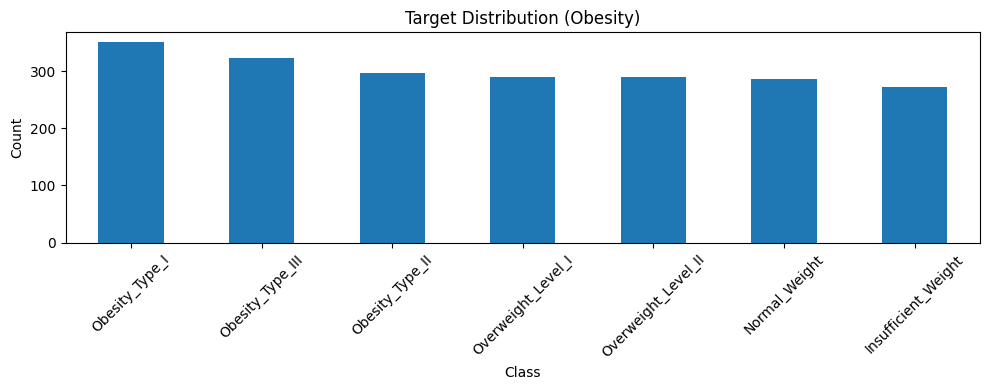

In [35]:
plt.figure(figsize=(10,4))
raw_obesity['Obesity'].value_counts().plot(kind='bar')
plt.title("Target Distribution (Obesity)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
# 4) Categorical columns (same as train.py one-hot list)
onehot_cols = ['Gender','family_history','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']
for c in onehot_cols:
    print("\n", c)
    print(raw_obesity[c].value_counts())


 Gender
Gender
Male      1068
Female    1043
Name: count, dtype: int64

 family_history
family_history
yes    1726
no      385
Name: count, dtype: int64

 FAVC
FAVC
yes    1866
no      245
Name: count, dtype: int64

 CAEC
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

 SMOKE
SMOKE
no     2067
yes      44
Name: count, dtype: int64

 SCC
SCC
no     2015
yes      96
Name: count, dtype: int64

 CALC
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

 MTRANS
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64


In [37]:
# 5) Numerical columns (same as train.py scaling list)
num_cols = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
raw_obesity[num_cols].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


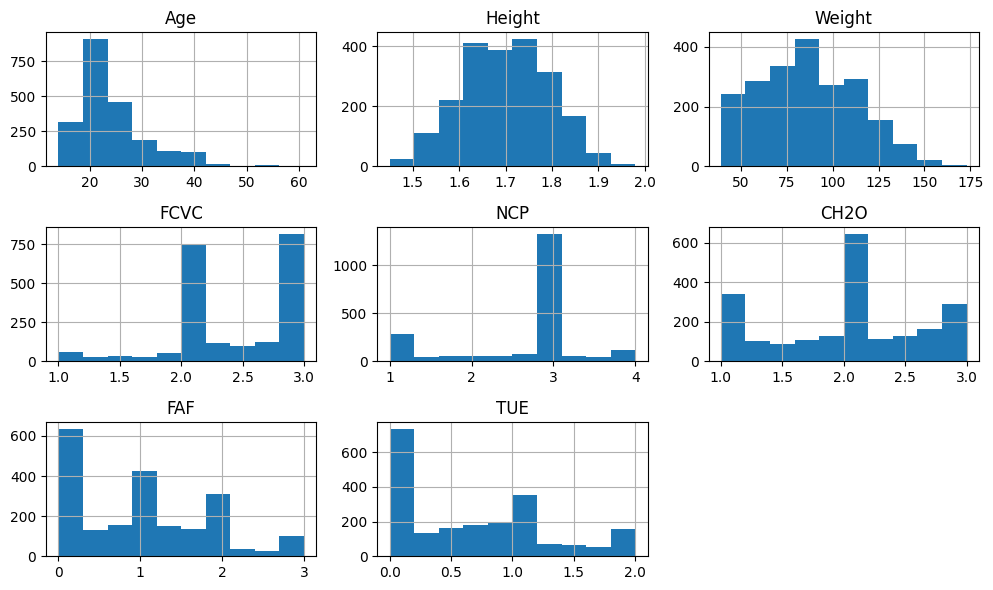

In [38]:
raw_obesity[num_cols].hist(figsize=(10,6))
plt.tight_layout()
plt.show()

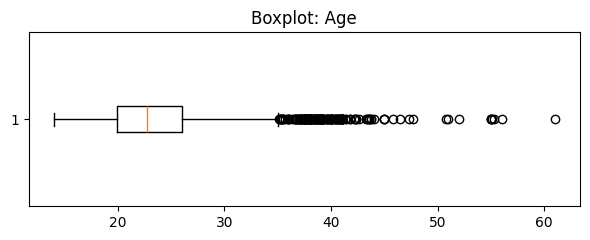

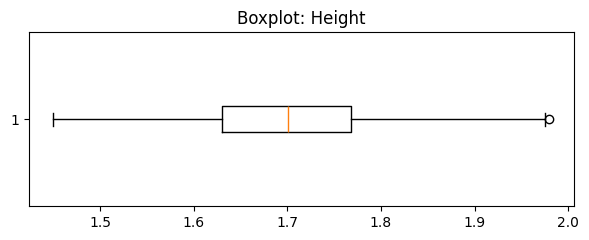

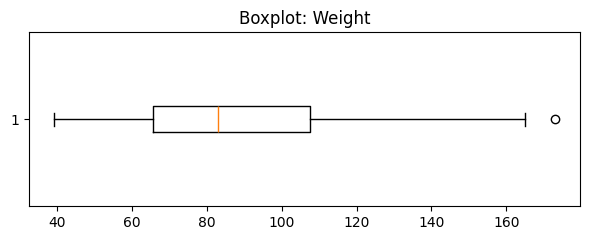

In [39]:
# Boxplots (quick outlier check)
for c in ['Age','Height','Weight']:
    plt.figure(figsize=(6,2.5))
    plt.boxplot(raw_obesity[c].dropna(), vert=False)
    plt.title(f"Boxplot: {c}")
    plt.tight_layout()
    plt.show()

In [40]:
# 6) Simple comparison by target (optional but looks good)
raw_obesity.groupby('Obesity')[['Age','Height','Weight']].mean().round(2)

,Age,Height,Weight
Obesity,,,
Insufficient_Weight,19.78,1.69,49.91
Normal_Weight,21.74,1.68,62.16
Obesity_Type_I,25.88,1.69,92.87
Obesity_Type_II,28.23,1.77,115.31
Obesity_Type_III,23.50,1.69,120.94
Overweight_Level_I,23.42,1.69,74.27
Overweight_Level_II,27.00,1.70,82.09


<Figure size 1000x400 with 0 Axes>

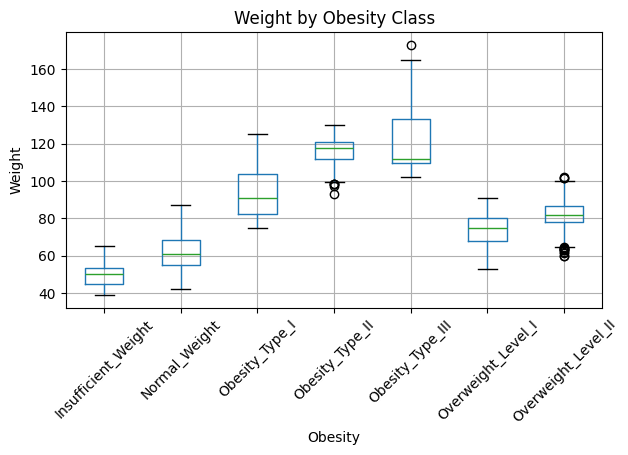

In [41]:
plt.figure(figsize=(10,4))
raw_obesity.boxplot(column='Weight', by='Obesity')
plt.title("Weight by Obesity Class")
plt.suptitle("")
plt.xlabel("Obesity")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

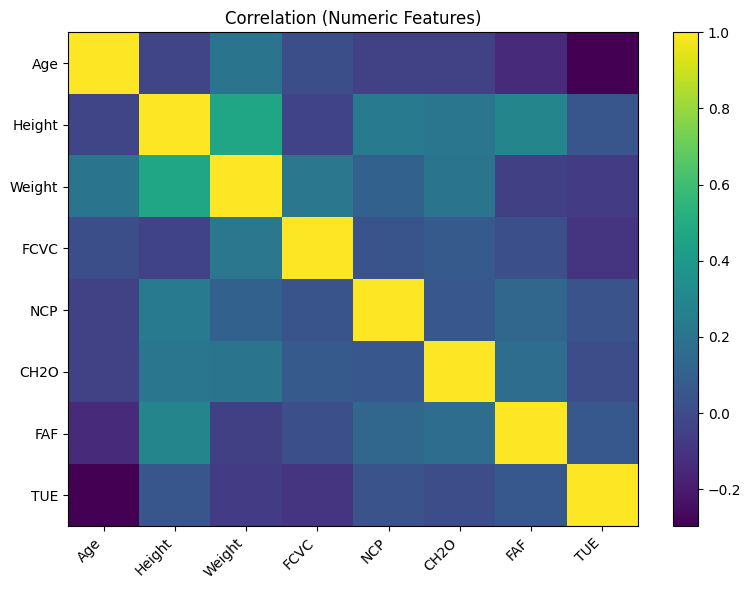

In [42]:
# 7) Correlation heatmap (numeric only)
corr = raw_obesity[num_cols].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha='right')
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation (Numeric Features)")
plt.tight_layout()
plt.show()

### EDA Summary

- Checked dataset size and feature structure.
- Verified class distribution of the target variable.
- Categorical features require encoding before training.
- Numerical features show different ranges, so scaling may be needed.